### <font color='red'>AVISO</font>:
**Esse projeto é ensinado passo-a-passo no Capítulo 2 do livro Mãos à obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow, 2a Edição, autor: Aurélien Géron. Link para o livro vendido na plataforma Amazon.com: [Clique Aqui](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=asc_df_8550815489/?tag=googleshopp00-20&linkCode=df0&hvadid=379715964603&hvpos=&hvnetw=g&hvrand=18316116785007080671&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9100802&hvtargid=pla-1390910077420&psc=1)**


### Passos executados no projeto:

**1. Analisar o panorama geral;**<br>
**2. Obter os dados dos preços dos imóveis da Califórnia, armazenado no repositório <font color = 'red'>StatLib</font>;**<br>
**<font color='red'>NOTA</font>: Esse conjunto de dados teve como base o censo feito na Califórnia em 1990.**<br><br>
**3. Identificar e visualizar os dados para obter informações úteis;**<br>
**4. Preparar os dados para os algoritmos do aprendizado de máquina;**<br>
**5. Selecionar e treinar o modelo;**<br>
**6. Aperfeiçoar o modelo.**<br>

## 1 - Panorama Geral

**O objetivo desse projeto será criar um modelo para as previsões de preços medianos dos imóveis (*median_house_value*), em qualquer região da Califórnia, para o setor imobiliário, usando, como dados de treinamento e teste, o censo do estado da Califórnia. Esses dados tem indicadores como**<br>
* **população (*population*);** 
* **moradores/famílias (*households*)**
* **renda mediana (*median_income*);**
* **preço mediano do imóvel para cada grupo de bairros/regiões (*median_house_value*);**
* **idade mediana dos imóveis (*housing_median_age*);**
* **total de quartos (*total_bedrooms*);**
* **total de cômodos (*total_rooms*);**
* **latitude (*latitude*);**
* **longitude (*longitude*);**
* **proximidade com o mar (*ocean_proximity*).**

### 1.1 - Abordagem do problema

* **Será criado um <font color='red'>modelo de aprendizado supervisionado</font>, uma vez que a base de dados apresenta exemplos rotulados para o treinamento, isto é, cada instância vem com a saída esperada que seria o preço mediano das moradias do bairro;**
<br><br>
* **Essa é uma tarefa típica de regressão <font color='red'>múltipla</font> <font color='blue'>univariada</font>, uma vez que a tarefa é utilizar <font color='red'>múltiplas características</font> para treinar o sistema e, assim, fazer a previsão de um <font color='blue'>único valor numérico contínuo</font>;**
<br><br>
* **Será usada a técnica de aprendizado em batch, já que não existe fluxo contínuo de dados entrando no sistema para a realização do aprendizado online. Também não existe a necessidade específica de ajustar rapidamente possíveis dados alterados, pois os dados são pequenos o suficiente para serem armazenados em memória.**

### 1.2 - Escolher uma medida de desempenho

**Uma medida típica de desempenho para problemas de regressão é a função de custo <font color='red'>Raiz quadrada do Erro Quadrático Médio</font> (<font color='red'>RMSE</font>, em inglês). Essa medida da uma ideia da magnitude dos erros gerados pelo sistema em suas previsões, atribuindo um peso maior para grandes erros.**<br><br>
**Quando há muitos *outliers* presentes na base de dados, pode-se usar uma outra função para o cálculo de desempenho, como o <font color='red'>Erro Médio Absoluto</font> (<font color='red'>MAE</font>, em inglês).**

## 2 - Download dos dados

**Nessa seção é criado um bloco de códigos que faz o download automaticamente dos dados necessários para esse projeto. Qualquer profissional, que estivesse trabalhando no atual projeto, poderia usar o navegador para fazer o download do arquivo housing.tgz e executar um descompactador para extrair o arquivo CSV necessário para o projeto, mas é preferível criar uma pequena função para essa tarefa. Construir uma função que possa baixar os dados automaticamente é uma "mão na roda", ainda mais se os dados sofrem alterações frequentemente.** 

In [1]:
# Importa alguns módulos 
import os # Acessa diretórios do sistema operacional
import tarfile # Descompacta arquivos TAR (.tgz)
import urllib # Auxilia no download dos dados

In [2]:
# Alguns caminhos necessários para download dos dados
download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
housing_dir_path = os.path.join("dados", "housing")
housing_url = download_root + "datasets/housing/housing.tgz"

In [3]:
# Essa função cria um diretório (dados/housing) no diretório atual, faz o download do arquivo housing.tgz e extrai
# o arquivo housing.csv no diretório criado.
def busca_housing_data(housing_url = housing_url, housing_dir_path = housing_dir_path):
    
    # Se o diretório dados/housing não existir ainda...
    if not os.path.isdir(housing_dir_path):
        
        # Cria o diretório
        os.makedirs(housing_dir_path)
    
    # Caminho para salvar o arquivo housing.tgz dentro da pasta housing
    tgz_path = os.path.join(housing_dir_path, "housing.tgz")
    
    # Acessa o arquivo housing.tgz no caminho housing_url, faz o download dele e o armazena no caminho tgz_path
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # Abre o arquivo housing.tgz
    housing_tgz = tarfile.open(tgz_path)
    
    # Extrai o arquivo housing.csv contido em housing.tgz para dentro do caminho housing_dir_path
    housing_tgz.extractall(path = housing_dir_path)
    
    # Fecha o arquivo housing.tgz
    housing_tgz.close()

In [4]:
# Faz a busca pelos dados housing.csv
busca_housing_data()

## 3 - Verificação da estrutura dos dados

In [5]:
# Importa o pacote Pandas
import pandas as pd

In [6]:
# Abre o arquivo housing.csv
housing = pd.read_csv(os.path.join(housing_dir_path, "housing.csv"))

In [7]:
# O método head() exibe as 5 primeiras linhas do dataframe housing
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Exibe a qntd de linhas e colunas (20640 linhas x 10 colunas)
housing.shape

(20640, 10)

**Pode-se verificar que há 10 atributos (colunas) na base de dados housing.csv. Em português: longitude, latitude, idade_mediana_imovel, total_comodos, total_quartos, populacao, moradores, renda_media, valor_medio_imovel e proximidade_mar.**

In [9]:
# Exibe uma descrição dos dados
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**O método <font color='red'>info()</font> exibe o número total de linhas (entradas), o número total de colunas, os nomes das colunas, a quantidade de valores não-nulos, o tipo de cada atributo e a memória usada para armazenamento dos dados.**
<br><br>
**1. Existem 20.640 instâncias na base de dados;**<br>
**2. O atributo total_bedrooms apresenta 20.433 valores não nulos, significando que há 207 valores NaN nesse atributo. Isso será tratado mais a frente;**<br>
**3. Todos os atributos são numéricos (float64), exceto o atributo ocean_proximity (tipo object). Esse último atributo contém valores string.**

In [10]:
# Exibe quais categorias existem no atributo ocean_proximity e quantas regiões pertencem a cada categoria
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# Exibe uma estatística descritiva dos atributos numéricos
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Explicação sobre cada linha:

**count = número de entradas não nulas em cada atributo;**<br>
**mean = média dos valores de cada atributo;**<br>
**std = desvio-padrão dos valores de cada atributo;**<br>
**min = valor mínimo de cada atributo;**<br>
**25% = percentil (1° quartil) que indica o valor no qual uma determinada porcentagem dos dados se encaixa em um grupo de observação;**<br>
**50% = percentil (2° quartil) que indica o valor no qual uma determinada porcentagem dos dados se encaixa em um grupo de observação;**<br>
**75% = percentil (3° quartil) que indica o valor no qual uma determinada porcentagem dos dados se encaixa em um grupo de observação;**<br>
**max = valor máximo de cada atributo;**<br>

**Verifica-se que 25% das regiões tem imóveis com idade mediana menor ou igual que 18, enquanto que 50% das regiões apresentam idade menor ou igual a 29 e 75% é menor ou igual a 37.**

### NOTA:
> #### Uma forma de verificar a distribuição, valores máximos e mínimos e frequência dos dados é plotar um histograma para cada atributo numérico. O histograma é um gráfico que mostra o número de instâncias (frequência) no eixo y que estejam contidas em um intervalo de valores no eixo x.

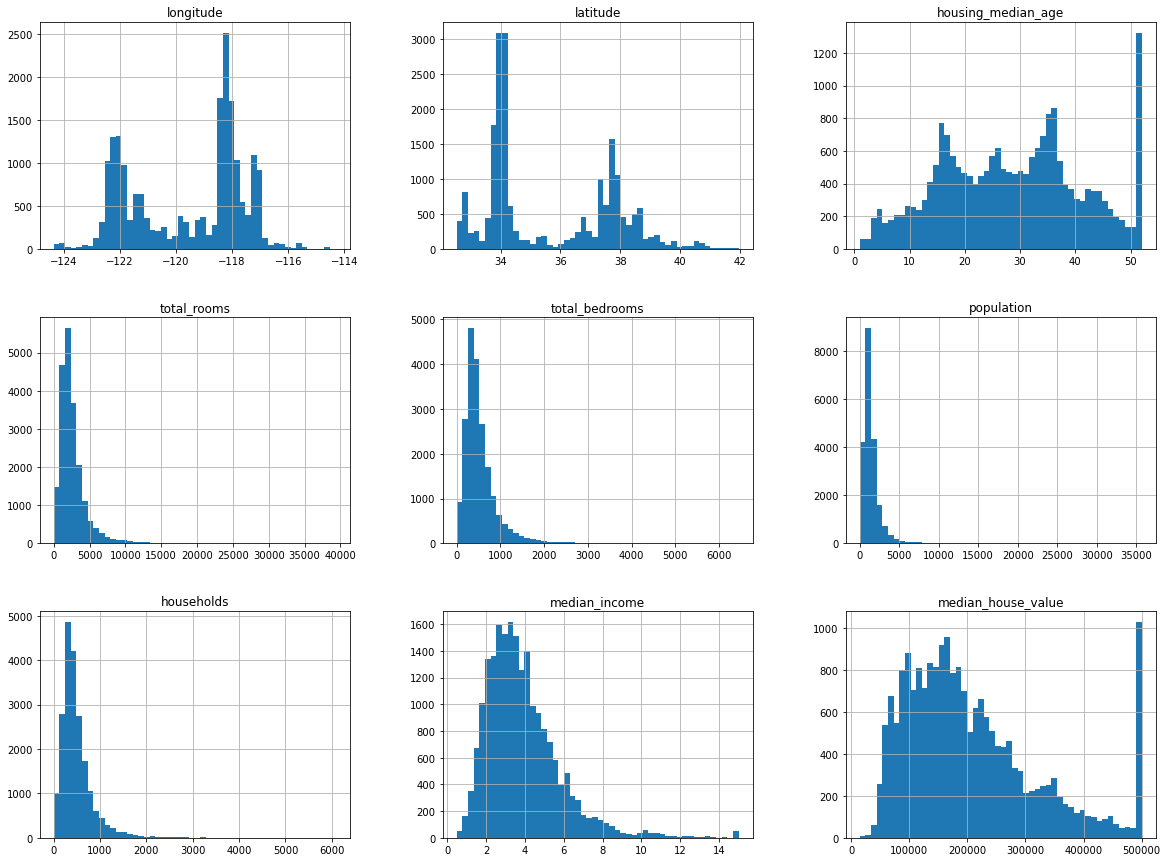

In [12]:
# Plota um histograma com os atributos numéricos
housing.hist(bins = 50, figsize = (20,15));

### Observações sobre os histogramas acima:

* **Os dados no atributo median_income (renda_mediana) não estão expressos em dólar, mas dimensionados para que as <font color='blue'>maiores</font> rendas fossem representadas pelo valor 15 e as <font color='red'>menores</font> rendas representadas pelo valor 0.5. É comum trabalhar, em *Machine Learning*, com atributos pré-processados.**
<br><br>
* **A *housing_median_age* (idade mediana dos imóveis) e o *median_house_value* (valor mediano dos imóveis) também foram pré-processados. Como o atributo valor mediano dos imóveis é o atributo-alvo, esse pré-processamento poderia ser um problema caso a ideia fosse prever o valor exato dos imóveis;**
<br><br>
* **Os atributos possuem escalas muito diferentes. Mais a frente haverá um pré-processamento dos dados para resolver tal questão;**
<br><br>
* **Muitos histogramas apresentam caldas alongadas. Elas se estendem mais à direita da média do que à esquerda. Isso pode dificultar a detecção de alguns padrões em alguns algoritmos de *Machine Learning*.**

## Explicações sobre 2 técnicas para amostragem dos dados: Amostragem Aleatória e Estratificada

**Segue uma explanação sobre amostragem aleatória e estratificada de dados. A separação dos dados em dados de treinamento e dados de teste são essenciais para promover a seleção, treinamento e teste de algum modelo de *Machine Learning*. Esses procedimentos serão executados em seções mais a diante.**

### <font color='red'>Amostragem Aleatória</font>

In [13]:
# Importa a classe que faz amostragem aleatória dos dados 
from sklearn.model_selection import train_test_split

In [14]:
# Amostragem aleatória dos dados
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

**A amostragem <font color='red'>aleatória</font> executada anteriormente é uma boa técnica para a situação em que o conjunto de dados é grande o suficiente, especialmente em relação ao número de atributos, mas, se não for o caso, o programador correrá o risco de introduzir um viés de amostragem significativo aos dados amostrados. Sempre que possível, é interessante manter as proporções dos subgrupos nas amostragens. Para manter as proporções, pode-se executar uma amostragem <font color='red'>estratificada</font>.**
<br><br>
**Vamos exemplificar a explicação anterior para a atual análise do conjunto de dados *housing*. Suponha que o programador tenha conversado com especialistas que alegaram que a renda mediana (atributo *median_income*) seja um atributo muito importante para estimar os preços medianos dos imóveis. O programador, então, quer assegurar que o conjunto de teste represente as diversas categorias de rendimentos em todo o conjunto de dados. Como a renda mediana é um atributo numérico contínuo, primeiro é necessário criar um atributo na categoria da renda. Ao avaliar que os rendimentos medianos chegam ao número 15, torna-se importante construir um conjunto de dados no qual apresente um número suficiente de instâncias para apenas alguns poucos estratos criados, evitando, assim, uma estimativa de estratos tendenciosa. Portanto, não se deve criar muitos estratos e cada estrato deve ser grande o bastante em termos de quantidade de instâncias.**

### <font color='red'>Amostragem Estratificada</font>

**O código, a seguir, usa a função <font color='red'>pd.cut</font> para criar um atributo de categoria de renda com 5 categorias (rotuladas de 1 a 5):**
<br><br>
**Categoria 1 --> dados variando de 0 a 1.5;**<br>
**Categoria 2 --> dados variando de 1.5 a 3.0;**<br>
**Categoria 3 --> dados variando de 3.0 a 4.5;**<br>
**Categoria 4 --> dados variando de 4.5 a 6.0;**<br>
**Categoria 5 --> dados variando de 6.0 a 15.0.**<br>

In [15]:
# Importa o numpy arrays
import numpy as np

In [16]:
# Cria um atributo com os valores de renda divididos em 5 estratos
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0, 1.5, 3.0, 4.5, 6, np.inf], labels = range(1, 6, 1))

In [17]:
# Exibe os valores do atributo income_cat
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

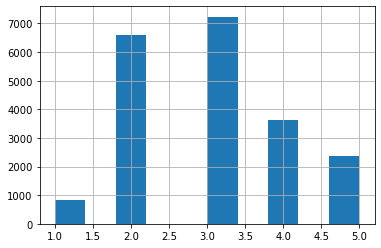

In [18]:
# Cria um histograma com os dados do atributo income_cat
housing["income_cat"].hist();

In [19]:
# Importa a classe que separa os dados em estratos
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
# Configura a amostragem estratificada
SPLIT = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 24)

In [21]:
# Obtém os indices das instâncias para treino e teste, estratificadas pelo atributo income_cat 
for train_index, test_index in SPLIT.split(housing, housing["income_cat"]):
    
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print("Alguns valores para os índices de treinamento: ", train_index)
print()
print("Alguns valores para os índices de teste: ", test_index)

Alguns valores para os índices de treinamento:  [ 3599  9707  3631 ... 12949    74  9861]

Alguns valores para os índices de teste:  [20525 18559 12705 ...  6271 12019  8146]


In [22]:
# Exibe o percentual dos dados de cada estrato com relação ao número total de dados 
strat_test_set["income_cat"].value_counts(normalize = True)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [23]:
# Cria uma função que calcula a proporção de cada estrato com relação a todos os dados
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# Cria uma amostragem aleatória para os dados de treinamento e teste
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Salva a proporção de todos os estratos com relação a todas as instâncias, dados estratificados e amostrados aleatoriamente 
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)}).sort_index()

# ERROS PERCENTUAIS:

# Calcula, em percentual, o quão acima ou abaixo a amostragem aleatória está com relação ao total de instâncias em housing
compare_props["Rand. %error"] = (100 * compare_props["Random"] / compare_props["Overall"]) - 100

# Calcula, em percentual, o quão acima ou abaixo a amostragem estratificada está com relação ao total de instâncias em housing
compare_props["Strat. %error"] = (100 * compare_props["Stratified"] / compare_props["Overall"]) - 100

In [24]:
# Exibe os cálculos de proporção e seus erros percentuais
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


**Observe que a amostragem estratificada (indicada como *Stratified* no dataframe) mantém as proporções dos subgrupos muito próximas as que são encontradas em toda a base de dados (indicada como *Overall* no dataframe) salva na variável *housing*. Já a amostragem aleatória (indicada como *Random*) insere um viés na amostragem que apresenta subgrupos em proporções diferentes dos encontrados na base de dados.**

## 4 - Exploração dos dados

### 4.1 - Visualização dos dados geográficos

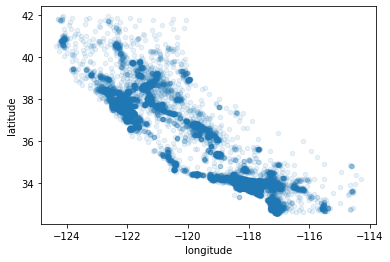

In [25]:
# Visualização dos dados geográficos em um gráfico de dispersão
# alpha = 0.1 facilita a visualização de regiões com alta densidade de pontos de dados
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1);

**O gráfico a seguir exibe 2 informações diferentes:**

* **os círculos representam a localização dos imóveis;** 
* **o raio de cada círculo representa a população da região;**
* **a cor representa o preço dos imóveis. As cores variam do azul (valores baixos) até o vermelho (valores altos).**

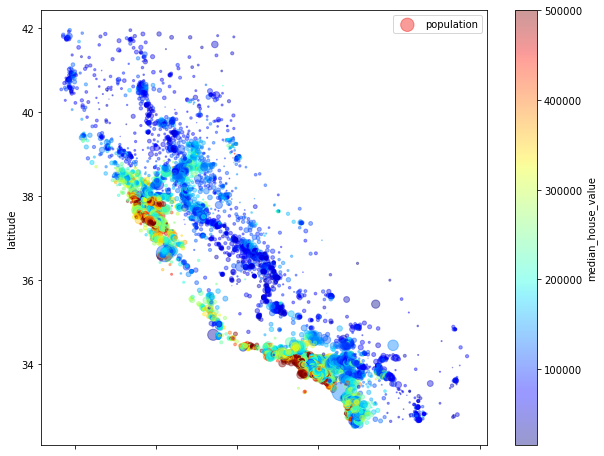

In [26]:
import matplotlib.pyplot as plt
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s = housing["population"]/100, 
            label = "population", figsize = (10, 8), c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend();

**A figura acima mostra que o preço dos imóveis tem relação com a localização (ex.: regiões avermelhadas/esverdeadas estão próximas ao mar) e com a densidade populacional. Os imóveis mais caros estão próximas ao mar.**

### 4.2 - Busca por correlações

**Já que o conjunto de dados não é muito grande, o coeficiente de correlação linear de Pearson pode ser facilmente calculado da seguinte forma**

In [27]:
# Calcula os coeficientes de correlação entre todas os atributos
corr_matrix = housing.corr()

In [28]:
# Exibe apenas os coeficientes de correlação entre o atributo valor mediano dos imóveis e os demais atributos
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**Duas conclusões que podem ser tiradas das correlações acima são**

* **O valor mediano dos imóveis sobe quando a renda mediana também sobe;**
* **O preço dos imóveis costumam diminuir quando a latitude aumenta (quando segue para Norte, afastando-se do mar).**

**Outra forma de verificar a correlação entre os atributos é usar a função do Pandas a seguir**

In [29]:
# Importa a classe que plota gráficos para verificar correlações entre atributos
from pandas.plotting import scatter_matrix

In [30]:
# Seleção dos atributos usados para o cálculo das correlações
atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

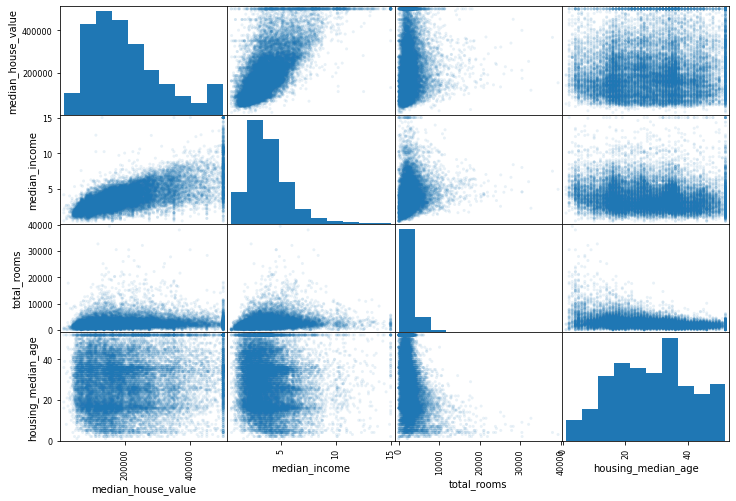

In [31]:
# Plota os gráficos
scatter_matrix(housing[atributos], figsize = (12, 8), alpha = 0.1);

**De todos os atributos apresentados acima aos pares, o atributo mais promissor para prever o valor mediano dos imóveis é a renda mediana. Abaixo é mostrado o gráfico de dispersão do valor mediano dos imóveis versus renda mediana.**

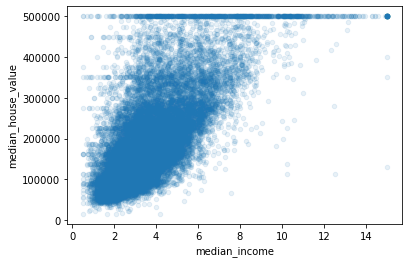

In [32]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1);

**Conclusões sobre o gráfico acima**

**1. É possível ver a forte correlação positiva entre o valor mediano dos imóveis e a renda mediana da população;**
<br>
**2. Há algumas linhas horizontais presentes nos dados:**
<br>
**2.1. 1a linha em USS 500 mil;**
<br>
**2.2. 2a linha em USS 450 mil;**
<br>
**2.3. 3a linha em USS 350 mil;**
<br>
**2.4. 4a linha em torno de USS 280 mil e, talvez, algumas outras em valores menores.**

**Tentar remover essas regiões correspondentes às linhas pode ajudar a evitar que os algoritmos aprendam a reproduzir tais peculiaridades.**

## 5 - Feature Engineering (Português: Engenharia de Características)

**Nessa seção são criados alguns atributos, a partir dos atributos existentes na base de dados, para futuro treinamento de modelos de *Machine Learning*.**

In [33]:
# 3 atributos criados: total de cômodos / moradores, total de quartos / total de cômodos, população de toda a região / moradores
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [34]:
# Calcula os coeficientes de correlação entre todas os atributos
corr_matrix = housing.corr()

In [35]:
# Exibe apenas os coeficientes de correlação entre o atributo valor mediano dos imóveis e os demais atributos
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

**Algumas conclusões sobre as correlações:**
    
**O atributo criado <font color = 'red'>bedrooms_per_room</font> está mais correlacionado que os atributos <font color = 'red'>total_bedrooms</font> e <font color = 'red'>total_rooms</font>. De acordo com o seu valor do coeficiente de correlação, quanto menor a relação quartos/cômodos, mais caro é o imóvel;**
<br><br>
**O atributo criado <font color = 'red'>rooms_per_household</font> está mais correlacionado que o atributo <font color = 'red'>total_bedrooms</font> que, de acordo com o seu valor do coef. de correlação, quanto maior for os imóveis, mais caros são.**
<br><br>


## 6 - Tratamento dos dados

**Nessa seção, é executado todo o pré-processamento dos dados para os algoritmos de *Machine Learning*.**

### 6.1 - Limpeza dos dados

In [36]:
# Copia os dados amostrados por estratificação
housing = strat_train_set.drop('median_house_value', axis = 1).copy()

# Salva apenas o atributo (alvo) com os valores a serem previstos
housing_labels = strat_train_set['median_house_value'].copy()

**A maioria dos algoritmos de *Machine Learning* não funciona com valores ausentes (valores NaN) e, por isso, serão criadas algumas funções que se encarregarão deles. Foi observado anteriormente que o atributo <font color='red'>total_bedroom</font> apresentava alguns valores NaN e isso será tratado nessa subseção.**
<br><br>
**Existem 3 formas básicas de resolver o problema da presença dos valores NaN no atributo <font color='red'>total_bedroom</font>:**
<br><br>
**1. Abrir mão das instâncias (regiões) correspondentes a esses valores NaN;**<br>
**2. Abrir mão de todo o atributo <font color='red'>total_bedroom</font>;**<br>
**3. Substituir os valores NaN por algum valor do tipo: zero, média, mediana, etc.**

**Solução selecionada: 3a opção - Substituir os valores NaN pela mediana do atributo <font color='red'>total_bedroom</font>.**

In [37]:
# Importa a classe que se encarrega de substituir os valores NaN pela mediana do atributo
from sklearn.impute import SimpleImputer

In [38]:
# Instancia a classe importada e a configura para substituir NaN's pela mediana
imputer = SimpleImputer(strategy = "median")

In [39]:
# Retira o atributo ocean_proximity da base de dados já que a mediana só pode ser calculada para valores numéricos
housing_num = housing.drop("ocean_proximity", axis = 1)

# Transforma o atributo 'income_cat' de categórico para inteiro
#housing_num['income_cat'] = housing_num['income_cat'].astype(int)

In [40]:
# Ajusta a instância imputer aos dados de treinamento
imputer.fit(housing_num)

SimpleImputer(strategy='median')

**A instância imputer calculou a mediana de cada atributo e armazenou o resultado na sua variável *statistics_.* Somente o atributo <font color='red'>total_bedroom</font> tinha valores ausentes, mas não se tem certeza de que não haverá valores ausentes nos dados novos, uma vez que o sistema esteja em produção, por isso é mais seguro aplicar a classe <font color='blue'>SimpleImputer</font> a todos os atributos numéricos.**

In [41]:
# Exibe o array com os valores das medianas para cada atributo
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  436.     ,
       1167.     ,  411.     ,    3.53285,    3.     ])

In [42]:
# Calcula a mediana de todas os atributos e os exibe
housing_num.median(numeric_only = True).values

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  436.     ,
       1167.     ,  411.     ,    3.53285])

In [43]:
# Utiliza a classe treinada para transformar o conjunto de treinamento, substituindo NaN's pela mediana
X = imputer.transform(housing_num)

In [44]:
# Transforma o array salvo em X em dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [45]:
# Exibe as 3 primeiras linhas do dataframe com os dados tranformados housing_tr
housing_tr.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
3599,-118.50,34.24,34.0,2634.0,412.0,1114.0,423.0,5.9401,4.0
9707,-121.65,36.67,52.0,2351.0,459.0,1169.0,439.0,2.8924,2.0
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,3.0


### 6.2 - Manipulação das strings no atributo ocean_proximity

**Chegou a vez de tratar os dados do tipo string, já que, até o momento, somente os dados numéricos foram tratados.**

In [46]:
# Separa o atributo ocean_proximity
housing_cat = housing[["ocean_proximity"]]

In [47]:
# Exibe as 10 primeiras instâncias do atributo
housing_cat.head(10)

,ocean_proximity
3599,<1H OCEAN
9707,<1H OCEAN
3631,<1H OCEAN
11688,<1H OCEAN
5642,NEAR OCEAN
12575,INLAND
6542,<1H OCEAN
2766,INLAND
9059,INLAND
17891,<1H OCEAN


In [48]:
# Importa a classe OrdinalEncoder para transformar os dados categóricos em numéricos
from sklearn.preprocessing import OrdinalEncoder

In [49]:
# Instania a classe importada
ordinal_encoder = OrdinalEncoder()

In [50]:
# Ajusta-se aos dados do atributo e transforma os dados categóricos em numéricos
housing_cat_encodered = ordinal_encoder.fit_transform(housing_cat)

In [51]:
# Exibe os 10 primeiros valores do array 
housing_cat_encodered[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [52]:
# Exibe a lista de categorias
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Trabalhar com <font color='green'>dados categóricos</font> codificados dessa forma pode não ser uma boa opção para o aprendizado dos algoritmos de *Machine Learning*. <font color='green'>Valores categóricos</font> que apresentaram <font color='red'>maiores</font> valores numéricos após a transformação executada pela classe OrdinalEncoder podem ser tratados pelos algoritmos como um atributo <font color='red'>mais</font> importante que os <font color='green'>valores categóricos</font> que apresentaram <font color='blue'>menores</font> valores e isso pode não ser verdade. Nessas situações, o mais indicado é aplicar a codificação distribuída (one-hot encoder), transformando os <font color='green'>atributos categóricos</font> em <font color='darkgoldenrod'>atributos dummy</font> (em portugues: atributos falsos).**

In [53]:
# Importa a classe OneHotEncoder para transformar os atributos categóricos em numéricos
from sklearn.preprocessing import OneHotEncoder

In [54]:
# Instancia a classe importada
cat_encoder = OneHotEncoder()

### <font color='red'>NOTA</font>:

**Antes da Scikit-Learn versão 0.20, o método OneHotEncoder().fit_transform() só podia codificar valores categóricos inteiros, mas desde a versão 0.20 também pode manipular outros tipos de entradas, incluindo entradas categóricas de texto.**

In [55]:
# Executa a transformação nos dados categóricos
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [56]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Observe que a saída acima é uma matriz esparsa SciPy, em vez de um array Numpy. Isso é bastante útil quando você tem atributos categóricos com milhares de categorias. Assim, uma matriz esparsa armazena apenas a localização dos elementos diferentes de zero dos atributos dummy. Caso queira converter a matriz esparsa para array, basta executar a seguinte linha de comando:**

In [57]:
# Exibe alguns valores dos atributos dummy em formato array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [58]:
# Exibe a lista de categorias
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### <font color='red'>DICA</font>:
>**Se um atributo categórico apresentar um grande número de categorias possíveis (por exemplo, código de país, profissão, espécie, etc), a codificação one-hot resultará em um grande número de características de entrada. Isso pode retardar o treinamento e prejudicar o desempenho dos algoritmos de *Machine Learning*. Caso isso ocorra, o programador poderá substituir a entrada categórica por características numéricas úteis, relacionadas às categorias: por exemplo, o programador pode substituir a categoria <font color='red'>ocean_proximity</font> por "ao nível médio do mar". Da mesma forma, os códigos dos países podem ser substituídos pela população e pelo PIB per capita do país. Como alternativa ainda, o programador pode substituir cada categoria por um vetor de baixa dimensão chamado *embedding*. A representação de cada categoria seria aprendida durante o treinamento. Esse é um exemplo de <font color='red'>aprendizado por representação </font>.**

### 6.3 - Criação de função que une atributos transformados

**Nessa seção é criada uma função que une todos os atributos numéricos e categóricos em um array do Numpy, após passarem por transformações nos seus dados**

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# Classe que une os valores dos atributos em um array do Numpy
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    # Método construtor. Hiperparâmetros =  índices das colunas correspondentes
    def __init__(self, add_bedrooms_per_room=True, rooms_ix = 3, bedrooms_ix = 4, population_ix = 5, households_ix = 6):
        
        # Variável que dita se o atributo bedrooms_per_room será unido com os outros atributos ou não
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.rooms_ix = rooms_ix
        self.bedrooms_ix = bedrooms_ix
        self.population_ix = population_ix
        self.households_ix = households_ix
    
    # Recebe os atributos (X) para serem unidos
    def fit(self, X, y=None):
        return self  # Nada mais a fazer
    
    # Une os atributos em um array do Numpy
    def transform(self, X):
        
        # Captura os valores fruto da divisão entre o atributo total_rooms e households
        rooms_per_household = X[:, self.rooms_ix] / X[:, self.households_ix]
        
        # Captura os valores fruto da divisão entre o atributo population e households
        population_per_household = X[:, self.population_ix] / X[:, self.households_ix]
        
        # Se add_bedrooms_per_room == True...
        if self.add_bedrooms_per_room:
            
            # Captura os valores fruto da divisão entre o atributo total_bedrooms e total_rooms
            bedrooms_per_room = X[:, self.bedrooms_ix] / X[:, self.rooms_ix]
            
            # Retorna um array do Numpy com a união dos valores de todos os atributos
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        
        # Caso contrário...
        else:
            
            # Retorna um array do Numpy com a união dos valores de todos os atributos, EXCETO o atributo bedrooms_per_room
            return np.c_[X, rooms_per_household, population_per_household]

### 6.4.1 - Testa a função criada

In [60]:
# Exibe as 3 primeiras linhas da base de dados original
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3599,-118.50,34.24,34.0,2634.0,412.0,1114.0,423.0,5.9401,<1H OCEAN,4
9707,-121.65,36.67,52.0,2351.0,459.0,1169.0,439.0,2.8924,<1H OCEAN,2
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,<1H OCEAN,3


In [61]:
# Configura a função criada para NÃO adicionar o atributo bedrooms_per_room a nova base de dados
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [62]:
# Executa a união de todos os atributos da base de dados housing, exceto o atributo bedrooms_per_room
housing_extra_attribs = attr_adder.transform(housing.values)

In [63]:
# Array do Numpy gerado pela união de todos os atributos, EXCETO o atributo bedrooms_per_room
housing_extra_attribs

array([[-118.5, 34.24, 34.0, ..., 4, 6.226950354609929,
        2.6335697399527187],
       [-121.65, 36.67, 52.0, ..., 2, 5.355353075170843,
        2.662870159453303],
       [-118.43, 34.23, 35.0, ..., 3, 5.322077922077922,
        3.3402597402597403],
       ...,
       [-121.28, 38.64, 19.0, ..., 3, 5.558320373250389,
        2.135303265940902],
       [-122.29, 37.81, 20.0, ..., 2, 6.2781954887218046,
        2.180451127819549],
       [-121.86, 36.6, 33.0, ..., 3, 4.858620689655172,
        2.182758620689655]], dtype=object)

### 6.4 - Escalonamento dos dados

**Quando os atributos numéricos apresentam escalas muito diferentes entre si, é necessário executar um escalonamento dos dados. Os algoritmos de *Machine Learning*, salvo raras exceções, não funcionam bem nessas situações. Um exemplo que pode ser citado é a diferença de escala entre o atributo número total de cômodos (<font color='red'>*total_rooms*</font>), que varia de 2 a 39.320, e o atributo renda mediana (<font color='red'>*median_income*</font>), variando apenas de 0.5 a 15.**
<br><br>
**<font color='red'>NOTA</font>**<br>
**Geralmente não é necessário não é necessário escalonar os valores-alvo (valores do atributo-alvo)**

### 6.4.1 - Escalonamento os dados

**Há 2 formas comuns de todos os atributos terem a mesma escala: <font color = 'red'>escalonamento min-max</font> e <font color = 'red'>padronização</font>**
<br><br>
**1. O escalonamento min-max (chamado por muitos programadores de normalização) é bastante simples: os valores são reescalonados de modo que acabam variando de 0 a 1. Esse reescalonamento é feito, seguindo a equação:**
### X<sub>escalonado</sub> = $\frac{X - Xmin}{Xmax - Xmin}$ <br>

**2. Na padronização, o cálculo feito é diferente: primeiro é feita a subtração do valor observado (dado) pela média dos valores do atributo em questão e depois é feita a divisão pelo desvio-padrão dos valores do atributo.**
### Z = X<sub>padronizado</sub> = $\frac{X - \mu}{\sigma}$

**A padronização tem a vantagem de não ser tão afetada pelos *outliers* como o escalonamento, mas pode ser um problema para alguns algoritmos como as redes neurais que geralmente esperam valores de entrada que variam entre 0 e 1.** 

### 6.5 - Transformação em Pipelines

**Como pode-se perceber, há muitas etapas de transformação dos dados que precisam ser executadas na ordem correta. Existe, para isso, a classe <font color='red'>*Pipeline*</font> fornecida pela biblioteca Scikit-Learn. Essa classe executa a sequência correta de transformações em poucas linhas de comando. Vejamos a construção de um pipeline para os atributos númericos <font color='red'>housing_num</font>**

In [64]:
# Importa a classe Pipeline e a classe StandardScaler para efetuar a padronização 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
num_pipeline = Pipeline([
    
    ("imputer", SimpleImputer(strategy = "median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

In [66]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [67]:
housing_num_tr

array([[ 0.53278693, -0.65087688,  0.42718146, ...,  0.30033316,
        -0.04002922, -0.86808857],
       [-1.04121521,  0.48713973,  1.85420529, ..., -0.03299719,
        -0.03749981, -0.28180275],
       [ 0.56776475, -0.65556007,  0.50646056, ..., -0.04572281,
         0.02097713, -0.35579564],
       ...,
       [-0.85633242,  1.40972933, -0.76200507, ...,  0.04462485,
        -0.08304302, -0.4033921 ],
       [-1.36101246,  1.02102407, -0.68272597, ...,  0.31993115,
        -0.07914555, -0.3183769 ],
       [-1.14614868,  0.45435736,  0.34790236, ..., -0.22296563,
        -0.07894635,  0.06025728]])

**O construtor <font color='red'>Pipeline</font> comporta uma lista de pares nome/estimador que definem uma sequência de etapas. Todos, exceto o último estimador, devem ser transformadores. Em outras palavras, todas as classes inseridas na lista do *Pipeline*, exceto a última, devem ter um método <font color='red'>fit_transform</font>.**

### <font color='red'>NOTA</font>:
**O nome para cada estimador, passado dentro do construtor Pipeline, pode ser qualquer um, desde que não apresente *underscore* duplo.**

**Ao chamar o método *fit()* do Pipeline, ele chama o *fit_transform()* sequencialmente em todos os transformadores, passando a saída de cada chamada como parâmetro para a próxima chamada até chegar ao estimador final que, por sua vez, chama o método *fit()*.**

**Não seria mais interessante se existisse uma classe que tratasse os dados numéricos e categóricos de uma vez só, ao invés de tratá-los separadamente? Então, essa classe existe no Scikit-Learn, cuja versão >= 0.20. A classe é o <font color='red'>ColumnTransformer</font> e essa classe funciona bem com Dataframes.**

In [68]:
# Importa a classe ColumnTransformer para tratar de toda a base de dados 
from sklearn.compose import ColumnTransformer

In [69]:
num_attribs = list(housing_num) # Lista dos atributos (nomes das colunas)
cat_attribs = ["ocean_proximity"] # Atributo (Coluna) com dados categóricos

In [70]:
# Configura os pipelines para cada tipo de dado
# num_pipeline é o Pipeline configurado anteriormente para os dados numéricos
full_pipeline = ColumnTransformer([
    
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    
])

In [71]:
# Aplica o Pipeline a todos os dados
housing_prepared = full_pipeline.fit_transform(housing)

In [72]:
# Exibe alguns valores da base de treinamento, após a aplicação do Pipeline aos dados
housing_prepared

array([[ 0.53278693, -0.65087688,  0.42718146, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04121521,  0.48713973,  1.85420529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56776475, -0.65556007,  0.50646056, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.85633242,  1.40972933, -0.76200507, ...,  0.        ,
         0.        ,  0.        ],
       [-1.36101246,  1.02102407, -0.68272597, ...,  0.        ,
         1.        ,  0.        ],
       [-1.14614868,  0.45435736,  0.34790236, ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
# Exibe alguns valores-alvo da base de treinamento
housing_labels

3599     315300.0
9707     169600.0
3631     181500.0
11688    170800.0
5642     350000.0
           ...   
399      261400.0
2843      76600.0
12949    242100.0
74       137500.0
9861     191200.0
Name: median_house_value, Length: 16512, dtype: float64

## 7 - Escolha e treinamento de modelo

**Graças as etapas anteriormente executadas, os próximos passos serão mais simples a partir de agora.**

### 7.1 - Regressão Linear

### 7.1.1 - Treinamento do modelo com a base de dados strat_train_set

In [74]:
# Importa o algoritmo de regressão linear
from sklearn.linear_model import LinearRegression

In [75]:
# Instancia o algoritmo (modelo)
lin_reg = LinearRegression()

In [76]:
# Treina o modelo
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

### 7.1.2 - Teste com a própria base de dados strat_train_set

In [77]:
# Importa a classe que calcula o RMSE
from sklearn.metrics import mean_squared_error

In [78]:
# Salva as previsões feitas usando todas as instâncias de dados pré-processadas
housing_lin_predictions_v1 = lin_reg.predict(housing_prepared)

In [79]:
print("Previsões: ", housing_lin_predictions_v1[0:10].round(1).tolist())

Previsões:  [307129.1, 226932.3, 235710.7, 150780.2, 281908.0, 140923.5, 167528.3, 103672.5, 176284.1, 225202.7]


In [80]:
print("Labels: ", list(housing_labels[0:10]))

Labels:  [315300.0, 169600.0, 181500.0, 170800.0, 350000.0, 71800.0, 175000.0, 62800.0, 119600.0, 67500.0]


In [81]:
# RMSE entre todas as instâncias de dados
lin_rmse = mean_squared_error(housing_labels, housing_lin_predictions_v1, squared = False)
lin_rmse

67962.48831130385

**A ideia agora é pegar a base de dados estratificada para teste (housing = <font color='red'>strat_test_set</font>), porém pré-processada (<font color='red'>test_data_prepared</font>), gerar previsões a partir dela e calcular o RMSE entre os rótulos da base de dados de teste <font color='red'>test_data_labels</font> e as previsões <font color='red'>predictions</font>.**

### 7.1.3 - Teste com a base de dados strat_test_set

In [82]:
# Pré-processa os dados da base de dados strat_test_set
test_data_prepared = full_pipeline.transform(strat_test_set.drop("median_house_value", axis = 1))

In [83]:
# Exibe alguns valores da base de dados strat_test_set, após a aplicação do Pipeline aos dados
test_data_prepared

array([[-0.99624372,  1.31606541,  1.14069338, ...,  0.        ,
         0.        ,  0.        ],
       [-1.24608532,  0.62295241,  1.85420529, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91129757,  1.39567974,  0.58573966, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.8076127 , -0.7445408 , -0.12777225, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02747331, -0.78668956, -1.31695878, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.73266021, -0.84757111,  0.58573966, ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
# Salva apenas o atributo (alvo) com os valores a serem previstos
test_data_labels = strat_test_set['median_house_value'].copy()

In [85]:
# Exibe alguns valores-alvo da base de dados strat_test_set
test_data_labels

20525    141700.0
18559    258300.0
12705    136600.0
19639     96300.0
2583      87500.0
           ...   
14098    103100.0
14038    129200.0
6271     150800.0
12019    169100.0
8146     244400.0
Name: median_house_value, Length: 4128, dtype: float64

In [86]:
# Salva as previsões feitas usando todas as instâncias de dados pré-processadas
housing_lin_predictions_v2 = lin_reg.predict(test_data_prepared)

In [87]:
print("Previsões: ", housing_lin_predictions_v2[0:10].round(1).tolist())

Previsões:  [131682.0, 305396.4, 128889.8, 115615.5, 122235.7, 72730.0, 246962.4, 68372.0, 245200.2, 217728.9]


In [88]:
print("Labels: ", list(test_data_labels[0:10]))

Labels:  [141700.0, 258300.0, 136600.0, 96300.0, 87500.0, 104600.0, 215900.0, 126100.0, 268400.0, 171100.0]


In [89]:
# Calcula o RMSE entre todos os valores-alvo e os previstos
lin_rmse = mean_squared_error(test_data_labels, housing_lin_predictions_v2, squared = False)
lin_rmse

68446.04040829756

**Pode-se notar que o modelo de regressão linear não se adaptou muito bem aos dados e isso é justificado pelo alto valor de RMSE na fase de treinamento (subseção 7.1.2). Para a fase de teste (subseção 7.1.3), o valor de RMSE também é alto, mostrando que o simples modelo de regressão linear pode não ser a melhor opção para a base de dados <font color='red'>housing</font>.**

### 7.2 - Random Forest Regressor

### 7.2.1 - Treinamento do modelo com a base de dados strat_train_set

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
forest_reg = RandomForestRegressor()

In [92]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

### 7.2.2 - Teste do modelo com a própria base de dados strat_train_set

In [93]:
# Salva as previsões feitas usando todas as instâncias de dados pré-processadas
housing_forest_predictions_v1 = forest_reg.predict(housing_prepared)

In [94]:
print("Previsões: ", housing_forest_predictions_v1[0:10].tolist())

Previsões:  [336064.0, 178528.0, 186806.0, 171146.0, 349485.02, 85862.0, 207949.09, 81675.0, 130108.0, 163121.09]


In [95]:
print("Labels: ", list(housing_labels[0:10]))

Labels:  [315300.0, 169600.0, 181500.0, 170800.0, 350000.0, 71800.0, 175000.0, 62800.0, 119600.0, 67500.0]


In [96]:
# RMSE entre todas as instâncias de dados
lin_rmse = mean_squared_error(housing_labels, housing_forest_predictions_v1, squared = False)
lin_rmse

18627.215904774708

### 7.2.3 - Teste do modelo com a base de dados strat_test_set

In [97]:
# Salva as previsões feitas usando todas as instâncias de dados pré-processadas
housing_forest_predictions_v2 = forest_reg.predict(test_data_prepared)

In [98]:
print("Previsões: ", housing_forest_predictions_v2[0:10].round(1).tolist())

Previsões:  [120135.0, 297738.0, 105017.0, 113368.0, 111679.0, 97170.0, 212129.0, 120825.0, 276531.0, 184913.0]


In [99]:
print("Labels: ", list(test_data_labels[0:10]))

Labels:  [141700.0, 258300.0, 136600.0, 96300.0, 87500.0, 104600.0, 215900.0, 126100.0, 268400.0, 171100.0]


In [100]:
# Calcula o RMSE entre todos os valores-alvo e os previstos
lin_rmse = mean_squared_error(test_data_labels, housing_forest_predictions_v2, squared = False)
lin_rmse

49166.34274850545

**Pode-se notar que o modelo de florestas aleatórias para regressão adaptou-se muito bem aos dados e isso é justificado pelo baixo valor de RMSE na fase de teste com a base de dados strat_train_set (subseção 7.2.2). Entretanto, na fase de teste com a base de dados strat_test_set (subseção 7.2.3), o valor apresentado para o RMSE é bem mais alto, mostrando que o modelo de florestas aleatórias para regressão sofreu *overfitting* em um certo grau.**

## 8 - Avaliação do modelo com validação cruzada

**Uma forma de avaliar o modelo de florestas aleatórias para regressão seria utilizar a função <font color='red'>cross_val_score</font> para dividir o conjunto de dados de treinamento em subconjuntos, onde cada um desses subconjuntos atuará como conjunto de validação e o restante deles, como conjunto de treinamento do modelo. O código a seguir divide aleatoriamente o conjunto de treinamento em 10 subconjuntos distintos chamados de *folds*. A função seleciona 9 *folds* para treinar o modelo e, com o 10° *fold*, ele avalia o modelo. Após isso, repete o processo usando outros 9 *folds* do mesmo conjunto e testa com o *fold* que sobrou. Esse processo é repetido 10 vezes.**

In [101]:
# Importa a função que executa a validação cruzada
from sklearn.model_selection import cross_val_score

In [102]:
# Salva os 10 scores/MSE's negativos gerados pela validação cruzada
np.random.seed(24)
scores = cross_val_score(RandomForestRegressor(), housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [103]:
# Calcula a raiz quadrada dos valores absolutos de cada score (RMSE's)
forest_reg_rmse_scores = np.sqrt(-scores)

In [104]:
# Exibe os 10 valores de RMSE
forest_reg_rmse_scores

array([51521.26999166, 49763.69536721, 46125.05449897, 46883.78653847,
       48838.96820742, 51763.3932361 , 50473.20258775, 50731.99829821,
       51642.19074116, 50052.03013786])

In [105]:
# Calcula a média dos 10 valores de RMSE
forest_reg_rmse_scores.mean()

49779.55896048189

In [106]:
# Calcula o desvio-padrão dos 10 valores de RMSE 
forest_reg_rmse_scores.std()

1858.1425944601745

**A média dos 10 valores de RMSE na fase de validação cruzada é próxima ao valor encontrado na subseção 7.2.3, com desvio-padrão de 1858.14: 49779.56 +- 1858.14. É interessante o uso do algoritmo Grid Search CV para buscar a melhor combinação de hiperparâmetros para o modelo de florestas aleatórias.**

## 9 - Aperfeiçoamento do modelo selecionado

**Supondo que após testar vários modelos promissores, o programador tenha escolhido a Floresta Aleatória para regressão (<font color='red'>Random Forest Regressor</font>) como o mais promissor. Pode-se então, a partir de agora, buscar pelo aperfeiçoamento do modelo selecionado. Essa tarefa pode ser executada utilizando-se de algum algoritmo que faça a busca automática pela melhor combinação possível de hiperparâmetros do modelo. O algoritmo escolhido e utilizado a seguir para tal tarefa é o <font color='red'>Grid Search CV</font>. Para o uso desse algoritmo, é necessário passar para ele quais hiperparâmetros e seus respectivos valores serão testados. O algoritmo, por sua vez, testa todas as combinações dentre os valores passados e indica para o programador qual é a melhor combinação possível.**

In [107]:
# Importa a classe que executará os testes dos hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [108]:
# Lista com alguns hiperparâmetros a serem testados
param_grid = [
    
    {"n_estimators": [500, 1000, 1500], "max_features": [4, 6, 8]},
    {"bootstrap":[False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

In [109]:
# Instancia o modelo escolhido: Floresta Aleatória para regressão
forest_reg = RandomForestRegressor()

In [110]:
# Instancia e configura o algoritmo de Grid Search CV
grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring='neg_mean_squared_error', return_train_score = True)

In [111]:
# Treina o algoritmo de Grid Search
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [500, 1000, 1500]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
# Exibe a melhor combinação de hiperparâmetros
grid_search.best_params_

{'max_features': 8, 'n_estimators': 1500}

In [113]:
# Exibe o melhor estimador diretamente
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=1500)

In [114]:
# Exibe todas as combinações de hiperparâmetros
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("score médio: ", f"{np.sqrt(-mean_score)}, ", "Parâmetros: ", params)

score médio:  49577.98985424471,  Parâmetros:  {'max_features': 4, 'n_estimators': 500}
score médio:  49550.22054989984,  Parâmetros:  {'max_features': 4, 'n_estimators': 1000}
score médio:  49574.919200600016,  Parâmetros:  {'max_features': 4, 'n_estimators': 1500}
score médio:  49257.97409965478,  Parâmetros:  {'max_features': 6, 'n_estimators': 500}
score médio:  49178.238100582,  Parâmetros:  {'max_features': 6, 'n_estimators': 1000}
score médio:  49199.92591186633,  Parâmetros:  {'max_features': 6, 'n_estimators': 1500}
score médio:  49165.862710798356,  Parâmetros:  {'max_features': 8, 'n_estimators': 500}
score médio:  49179.9224494301,  Parâmetros:  {'max_features': 8, 'n_estimators': 1000}
score médio:  49130.52219519488,  Parâmetros:  {'max_features': 8, 'n_estimators': 1500}
score médio:  61257.71323240584,  Parâmetros:  {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
score médio:  53831.453511093125,  Parâmetros:  {'bootstrap': False, 'max_features': 2, 'n_estima

### <font color='red'>NOTA</font>.: 

* **Existem 2 dicionários dentro da lista <font color='red'>param_grid</font>. Cada dicionário apresenta alguns hiperparâmetros. Cada hiperparâmetro apresenta, por sua vez, uma lista de valores a serem testados. A quantidade de combinações possíveis para cada dicionário é encontrada, fazendo a multiplicação de todas as quantidades de valores para cada hiperparâmetro dentro do dicionário. Exemplo, no primeiro dicionário dentro da lista <font color='red'>param_grid</font> há 2 hiperparâmetros com 3 valores cada um. O total de combinações possíveis dos valores para os hiperparâmetros é 3 x 3 = 9. No segundo dicionário, por sua vez, o total de combinações possíveis é 1 x 2 x 3 = 6. Logo, o total de combinações possíveis somando as combinações dos 2 dicionários é 9 + 6 = 15.** 
<br><br>
* **Cada uma das 15 combinações possíveis será treinada n vezes (n = cv = 10), conforme foi definido no algoritmo <font color='red'>Grid Search CV</font>. Isso gerará 10 valores de *score* para cada combinação possível.**
<br><br>
* **O valor do <font color='red'>*score* médio</font> é a média de todos os *scores* encontrados para os n treinamentos feitos para cada combinação de hiperparâmetro. Para o Grid Search executado nas linhas anteriores, n = cv = 10.**

### 9.1 - Teste do modelo com a base de dados strat_test_set

In [115]:
# Instancia o modelo selecionado e treinado com os melhores hiperparâmetros
final_model = grid_search.best_estimator_

In [116]:
# Salva os dados de teste da base strat_test_set
X_test = strat_test_set.drop("median_house_value", axis = 1)

In [117]:
# Salva os valores-alvo de teste da base strat_test_set
y_test = strat_test_set["median_house_value"].copy()

In [118]:
# Faz a transformação dos dados de teste
X_test_prepared = full_pipeline.transform(X_test)

In [119]:
# Faz as previsões dos valores-alvo
final_predictions = final_model.predict(X_test_prepared)

In [120]:
# Cálculo do RMSE entre os valores-alvo observados e os previstos
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse.round(1)

48836.0

**Houve uma pequena melhora no RMSE do modelo, em comparação ao encontrado na subseção 7.2.3.**

## 10 - Salvamento e posterior teste do modelo treinado

**Para salvar todo o processo de transformação nos dados e o modelo treinado com os melhores hiperparâmetros, é necessário a criação de 2 objetos, um que instância o modelo e outro que instancia o *Pipeline* de transformações e salvá-los como .PKL, por exemplo. Isso é desenvolvido nessa seção.**

### 10.1 - Salvamento do modelo

In [121]:
# Importa a classe que salva o modelo treinado no formato .PKL
import joblib

In [122]:
# Salva o modelo
joblib.dump(final_model, "my_model.pkl")

['my_model.pkl']

In [123]:
# Salva o pipeline de transformações
joblib.dump(full_pipeline, "my_pipeline.pkl")

['my_pipeline.pkl']

### 10.2 - Carregamento do modelo salvo

In [124]:
# Faz o carregamento do modelo treinado
my_model_loaded = joblib.load("my_model.pkl")

In [125]:
# Faz o carregamento do pipeline
full_pipeline_loaded = joblib.load("my_pipeline.pkl")

In [126]:
my_model_loaded

RandomForestRegressor(max_features=8, n_estimators=1500)

In [127]:
full_pipeline_loaded

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'income_cat']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

### 10.3 - Teste do modelo carregado

In [128]:
# Salva os dados de teste da base strat_test_set
X_test_loaded = strat_test_set.drop("median_house_value", axis = 1)

In [129]:
# Salva os valores-alvo de teste da base strat_test_set
y_test_loaded = strat_test_set["median_house_value"].copy()

In [130]:
# Faz a transformação dos dados de teste
X_test_loaded_prepared = full_pipeline_loaded.transform(X_test_loaded)

In [131]:
# Faz as previsões dos valores-alvo
predictions = my_model_loaded.predict(X_test_loaded_prepared)

In [132]:
# Cálculo do RMSE entre os valores-alvo observados e os previstos
final_rmse = mean_squared_error(y_test_loaded, predictions, squared = False)
final_rmse.round(1)

48836.0

### <font color='red'>NOTA</font>.: 

**1. É importante salvar o conjunto de dados <font color='red'>strat_test_set</font> em um arquivo .CSV, por exemplo, para tratá-lo nessa última seção do código;**
<br><br>
**2. A função <font color='red'>CombinedAttributesAdder</font> precisa ser redefinida (digitada novamente) no *script* que houver importação do Pipeline no arquivo <font color='red'>my_pipeline.pkl</font> ou deverá ser importada, caso a função tenha sido salva em um arquivo .PY**